# Prova 2 - Métodos Numéricos 2025.1
### João Pedro Cobra Casici

Importando pacote e salvando número da chamada

In [1]:
import JoãoPedroCobraCasici2 as jp
n = 4

1A)

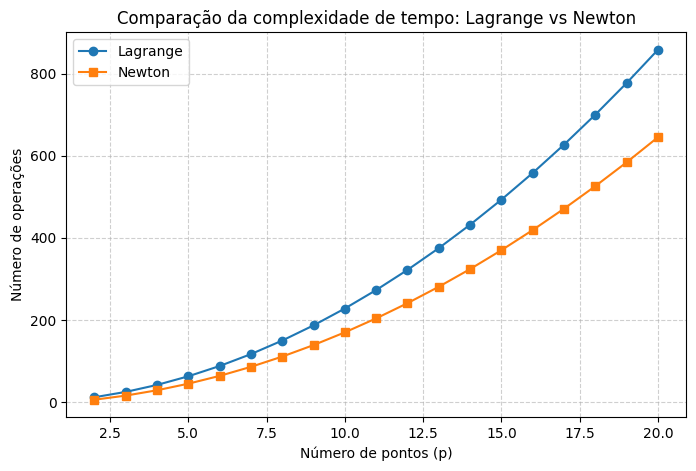

In [2]:
import numpy as np
import matplotlib.pyplot as plt

p = np.arange(2, 21)
lagrange_ops = 2 * p**2 + 3 * p - 2
newton_ops = (3 * p**2 + 5 * p - 10) / 2

plt.figure(figsize=(8,5))
plt.plot(p, lagrange_ops, label='Lagrange', marker='o')
plt.plot(p, newton_ops, label='Newton', marker='s')
plt.xlabel('Número de pontos (p)')
plt.ylabel('Número de operações')
plt.title('Comparação da complexidade de tempo: Lagrange vs Newton')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

1B)

In [3]:
x = np.array([-1, 1, 2, 3, 5])
fx = np.array([-4*n, 0, 3*n, 5*n, 3*n])

print(fx)

f_de_0 = jp.interpol_newton(x, fx, 0)

print(f"Pelo método da interpolação de newton f(0) é aproximadamente {f_de_0:.4f}")


[-16   0  12  20  12]
Pelo método da interpolação de newton f(0) é aproximadamente -11.3333


1C)

In [4]:
x1 = np.array([-2, 0, 1, 2, 4, 5])
fx1 = np.array([5*n, n, 3*n, -n, -n, 0])

print('Tabela de diferenças divididas:')
print(jp.tabela_diferencas_divididas(x1, fx1))

Tabela de diferenças divididas:
i     | x_i        | y_i          | D^1 y_i      | D^2 y_i      | D^3 y_i      | D^4 y_i      | D^5 y_i     
------------------------------------------------------------------------------------------------------------
0     | -2.0000    | 20.0000      | -8.0000      | 5.3333       | -4.3333      | 1.4444       | -0.3587     
1     | 0.0000     | 4.0000       | 8.0000       | -12.0000     | 4.3333       | -1.0667      |             
2     | 1.0000     | 12.0000      | -16.0000     | 5.3333       | -1.0000      |              |             
3     | 2.0000     | -4.0000      | 0.0000       | 1.3333       |              |              |             
4     | 4.0000     | -4.0000      | 4.0000       |              |              |              |             
5     | 5.0000     | 0.0000       |              |              |              |              |             



2A)

In [5]:
vel_carro = np.array([0, 20*n, 22*n, 24*n, 30*n, 33*n, 34*n, 35*n, 33*n, 30*n, 18*n, 0])

tempo_total = 84
intervalo = 6 
n_pontos = len(vel_carro)
tempos = np.linspace(0, tempo_total, n_pontos)

def vel_interp(t):
    return jp.lagrange_interpol(tempos, vel_carro, t)

comprimento = jp.integral_numerica(vel_interp, 0, tempo_total, n_points=1000)
print(f"O comprimento da pista usando integral numerica é aproximadamente {comprimento:.4f} metros.")

O comprimento da pista usando integral numerica é aproximadamente 8473.9266 metros.


2B)

O comprimento da pista usando Lagrange com 3 pontos é aproximadamente 7679.4590 metros.


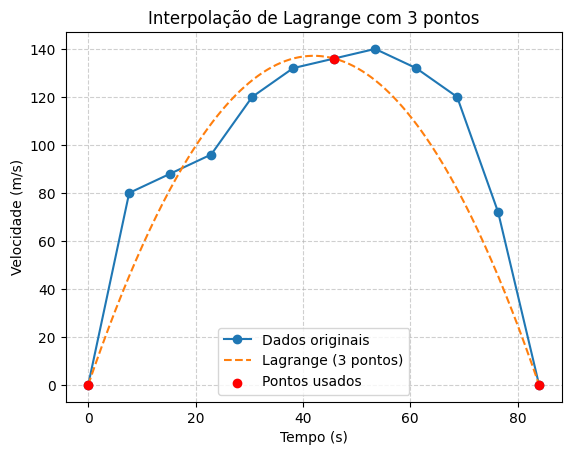

In [6]:
idx0 = 0
idx1 = len(tempos) // 2
idx2 = len(tempos) - 1
t3 = np.array([tempos[idx0], tempos[idx1], tempos[idx2]])
v3 = np.array([vel_carro[idx0], vel_carro[idx1], vel_carro[idx2]])

def vel_lagrange3(t):
    import numpy as np
    t = np.array(t)
    return jp.lagrange_interpol(t3, v3, t)

comprimento_lagrange3 = jp.integral_numerica(vel_lagrange3, 0, tempo_total, n_points=1000)
print(f"O comprimento da pista usando Lagrange com 3 pontos é aproximadamente {comprimento_lagrange3:.4f} metros.")

import matplotlib.pyplot as plt
t_plot = np.linspace(0, tempo_total, 200)
plt.plot(tempos, vel_carro, 'o-', label='Dados originais')
plt.plot(t_plot, vel_lagrange3(t_plot), '--', label='Lagrange (3 pontos)')
plt.scatter(t3, v3, color='red', zorder=5, label='Pontos usados')
plt.xlabel('Tempo (s)')
plt.ylabel('Velocidade (m/s)')
plt.title('Interpolação de Lagrange com 3 pontos')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

2C)

### Análise Crítica dos Resultados da Integração
Ao calcular o comprimento da pista usando todos os pontos de velocidade com interpolação de Lagrange, obtemos um valor que leva em conta todas as variações de velocidade medidas. Já ao usar apenas 3 pontos (início, meio e fim) e um polinômio de Lagrange de grau 2, estamos assumindo que a relação entre velocidade e tempo é perfeitamente parabólica.

No entanto, se o movimento do carro é uniformemente variado, a relação entre velocidade e tempo deveria ser linear. Nesse caso, o polinômio de grau 2 pode introduzir erros, principalmente se os dados reais tiverem ruídos ou variações não lineares.

Assim, o resultado com todos os pontos tende a ser mais fiel aos dados experimentais, mas pode superestimar ou subestimar o comprimento se houver erros de medição ou se a interpolação de grau alto oscilar demais. Já o resultado com 3 pontos e polinômio de grau 2 pode ser mais próximo do real se o movimento for realmente linear, mas pode ser impreciso se os pontos escolhidos não representarem bem o comportamento global.

Portanto, para um movimento uniformemente variado, o ideal seria usar apenas os pontos inicial e final (ou um ajuste linear), pois a área sob a curva velocidade x tempo é exatamente a área do trapézio formado por esses dois pontos. O uso de muitos pontos e polinômios de grau alto só se justifica se houver variações reais e significativas na velocidade ao longo do tempo.

3)

In [7]:
def gera_sistema(n):
    np.random.seed(n)
    if n < 10:
        A = np.random.rand(20 + n, 20 + n)
        matriz = np.dot(A.T, A) + (20 + n) * np.eye(20 + n)
        b = np.random.rand(20 + n)
    else:
        A = np.random.rand(n + 5, n + 5)
        matriz = np.dot(A.T, A) + (n + 5) * np.eye(n + 5)
        b = np.random.rand(n + 5)
    return matriz, b

3A)

In [8]:
A, b = gera_sistema(n)
L = jp.decomp_cholesky(A)
print('Matriz triangular inferior L obtida pela decomposição de Cholesky:')
print(L)

Matriz triangular inferior L obtida pela decomposição de Cholesky:
[[5.82436075 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.51353614 5.62252534 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.1844862  1.00880595 5.50028786 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [1.2321836  0.86024855 0.76976121 5.40295368 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.  

3B)

In [10]:
y = jp.subst_progressiva(L, b)
x = jp.subist_regressiva(L.T, y)
print('Solução do sistema:')
print(x)

Solução do sistema:
[-0.01253862  0.01867345  0.00634448  0.00666249  0.01037358  0.01843693
  0.01914904 -0.00888027 -0.01432215 -0.01207017  0.02316107  0.00757976
 -0.00169751  0.00938432 -0.00986873 -0.00189659 -0.00268554  0.01331772
 -0.0065603   0.02352113 -0.01755403 -0.01267966 -0.00878367  0.02352364]


3C)

In [11]:
# Código original:
def decomp_cholesky(A):
    import numpy as np
    n = A.shape[0]
    L = np.zeros_like(A)
    for i in range(n):
        for j in range(i+1):
            s = sum(L[i][k] * L[j][k] for k in range(j))
            if i == j:
                L[i][j] = np.sqrt(A[i][i] - s)
            else:
                L[i][j] = (A[i][j] - s) / L[j][j]
    return L

# Código para verificação se a matriz é definida positiva:
def decomp_cholesky_verifica(A):
    import numpy as np
    n = A.shape[0]
    L = np.zeros_like(A)
    for i in range(n):
        for j in range(i+1):
            s = sum(L[i][k] * L[j][k] for k in range(j))
            if i == j:
                valor = A[i][i] - s
                if valor <= 0:
                    print(f"A matriz NÃO é definida positiva (valor negativo na diagonal: {valor})")
                    return None
                L[i][j] = np.sqrt(valor)
            else:
                L[i][j] = (A[i][j] - s) / L[j][j]
    print("A matriz é definida positiva (decomposição de Cholesky bem-sucedida)")
    return L



A decomposição de Cholesky só é possível para matrizes simétricas e definidas positivas. Isso significa que, para toda matriz A simétrica, existe uma matriz triangular inferior L tal que A = L @ L.T se, e somente se, todos os pivôs (elementos da diagonal) calculados durante o processo forem estritamente positivos.

Durante a decomposição, ao calcular cada elemento da diagonal (L[i][i]), é feita a raiz quadrada de um valor que representa o pivô atualizado:
- Se esse valor for negativo ou zero, a matriz não é definida positiva, pois existe pelo menos um vetor x para o qual x^T A x <= 0.
- Se todos os valores forem positivos, a matriz é definida positiva, pois todos os menores principais (determinantes das submatrizes principais) também são positivos.

Portanto, a checagem `if valor <= 0:` garante que a matriz só terá decomposição de Cholesky se for definida positiva. Se algum valor for negativo, a função interrompe e informa que a matriz não é definida positiva.